### Simulación del Examen (Core)

**Fundamentos de Data Science – Práctica para el Examen**

**Contexto:**

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

**Requisitos:**

**1) Limpieza de Datos:**

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

**Identificar y abordar cualquier valor duplicado.**

**Identificar y abordar cualquier dato que falte en este conjunto de datos.** Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.

**Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**

**Identificar y abordar cualquier inconsistencia en los valores categóricos** (ejemplo: android, Android, ANDROID).

**Identificar y abordar cualquier punto de datos inapropiados o inusuales** (ejemplo: tiempo de uso de 10000 horas en una semana).

**2) Exploración de Datos:**

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

**Dos tipos diferentes de visualizaciones exploratorias univariantes.** Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**Dos tipos diferentes de visualizaciones exploratorias multivariantes.** Cada visualización debe incluir una breve interpretación dentro del archivo de código.


**Diccionario de Datos:**

**user_id:** Identificación única del usuario.
**app_version:** Versión de la aplicación usada.
**platform:** Plataforma del dispositivo (Android, iOS).
**session_duration:** Duración de la sesión en minutos.
**number_of_sessions:** Número de sesiones en un día.
**country:** País del usuario.
**user_feedback:** Puntuación de la experiencia del usuario (1-5).

**Codigo para generar los datos**


In [1]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('../data/user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [61]:
import numpy as np
import pandas as pd
import json

In [62]:
# Paso 1: Cargar el dataset
df = pd.read_csv('../data/user_app_data.csv')
print(df.shape)
df.head()

(300, 7)


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [12]:
# Contar el número de filas duplicadas en el DataFrame
num_duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


In [13]:
df.isnull().sum(axis=0)

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

In [14]:
# Definir los tipos de datos esperados
schema = {
    'user_id': 'int64',              # Identificación única del usuario
    'app_version': 'object',         # Versión de la aplicación
    'platform': 'object',            # Plataforma del dispositivo
    'session_duration': 'float64',   # Duración de la sesión en minutos
    'number_of_sessions': 'int64',   # Número de sesiones en un día
    'country': 'object',             # País del usuario
    'user_feedback': 'int64'         # Puntuación de la experiencia del usuario (1-5)
}


In [15]:
# Convertir las columnas a los tipos de datos esperados
for column, dtype in schema.items():
    if dtype == 'datetime64[ns]':
        df[column] = pd.to_datetime(df[column], errors='coerce')
    else:
        df[column] = df[column].astype(dtype, errors='raise')  # Cambia a 'coerce' si quieres manejar errores

In [16]:
# Verificar si hay valores NaN después de la conversión
columnas_con_nan = df.columns[df.isna().any()].tolist()
print(f"Las siguientes columnas tienen valores no convertibles: {columnas_con_nan}")


Las siguientes columnas tienen valores no convertibles: []


In [23]:
# 1. Identificar los valores únicos en la columna 'platform'
valores_unicos_iniciales = df['platform'].unique()
print(f"Valores únicos iniciales en 'platform': {valores_unicos_iniciales}")

# 2. Convertir todos los valores a minúsculas
df['platform'] = df['platform'].str.lower()

# 3. Verificar los valores únicos después de la conversión
valores_unicos_finales = df['platform'].unique()
print(f"Valores únicos finales en 'platform': {valores_unicos_finales}")

Valores únicos iniciales en 'platform': ['android' 'ios']
Valores únicos finales en 'platform': ['android' 'ios']


In [18]:
# 3. Verificar los valores únicos después de la conversión
valores_unicos_finales = df['platform'].unique()
print(f"Valores únicos finales en 'platform': {valores_unicos_finales}")

Valores únicos finales en 'platform': ['android' 'ios']


In [20]:
# Si valores_unicos_iniciales es una lista
print("Tipo de la lista:", type(valores_unicos_iniciales))

Tipo de la lista: <class 'numpy.ndarray'>


In [24]:
# Comparar si son iguales
son_iguales = np.array_equal(valores_unicos_iniciales, valores_unicos_finales)

print(f"Array1 y Array2 son iguales: {son_iguales}")  # Salida: True


Array1 y Array2 son iguales: True


In [25]:
print(df['session_duration'].describe())

count    300.000000
mean      95.840000
std       51.922773
min        1.000000
25%       51.250000
50%      100.500000
75%      141.250000
max      179.000000
Name: session_duration, dtype: float64


In [26]:
# Identificar valores inusuales
valores_inusuales = df[df['session_duration'] > 24 * 60]  # Por ejemplo, sesiones mayores a 1440 minutos (24 horas)
print("Puntos de datos inusuales:\n", valores_inusuales)

Puntos de datos inusuales:
 Empty DataFrame
Columns: [user_id, app_version, platform, session_duration, number_of_sessions, country, user_feedback]
Index: []


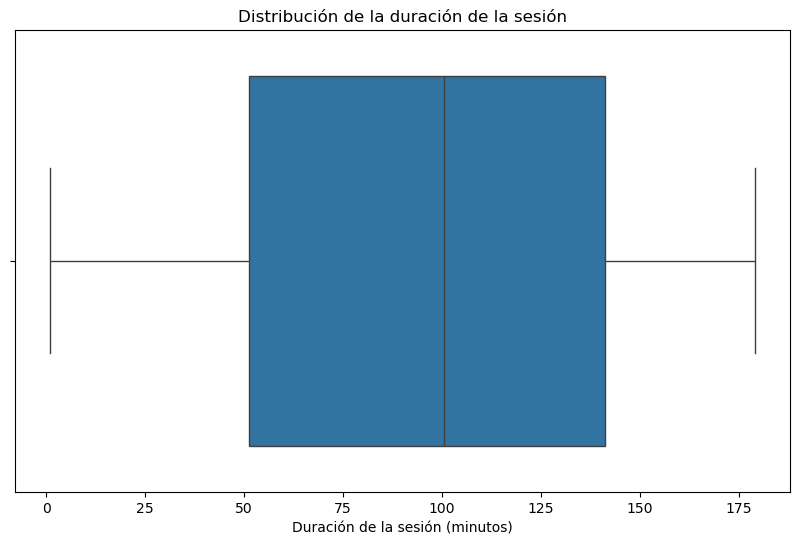

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['session_duration'])
plt.title('Distribución de la duración de la sesión')
plt.xlabel('Duración de la sesión (minutos)')
plt.show()

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    object 
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    float64
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 16.5+ KB
None


In [30]:
# Agrupar por país y sumar la duración de las sesiones
duracion_por_pais = df.groupby('country')['session_duration'].sum().reset_index()

# Imprimir los resultados
print(duracion_por_pais)


   country  session_duration
0   Canada            3295.0
1   France            3445.0
2  Germany            4084.0
3    Italy            3170.0
4   Mexico            3601.0
5    Spain            4276.0
6       UK            3399.0
7      USA            3482.0


In [31]:
# Agrupar por plataforma y sumar la duración de las sesiones
duracion_por_plataforma = df.groupby('platform')['session_duration'].sum().reset_index()

# Imprimir los resultados
print(duracion_por_plataforma)


  platform  session_duration
0  android           12213.0
1      ios           16539.0


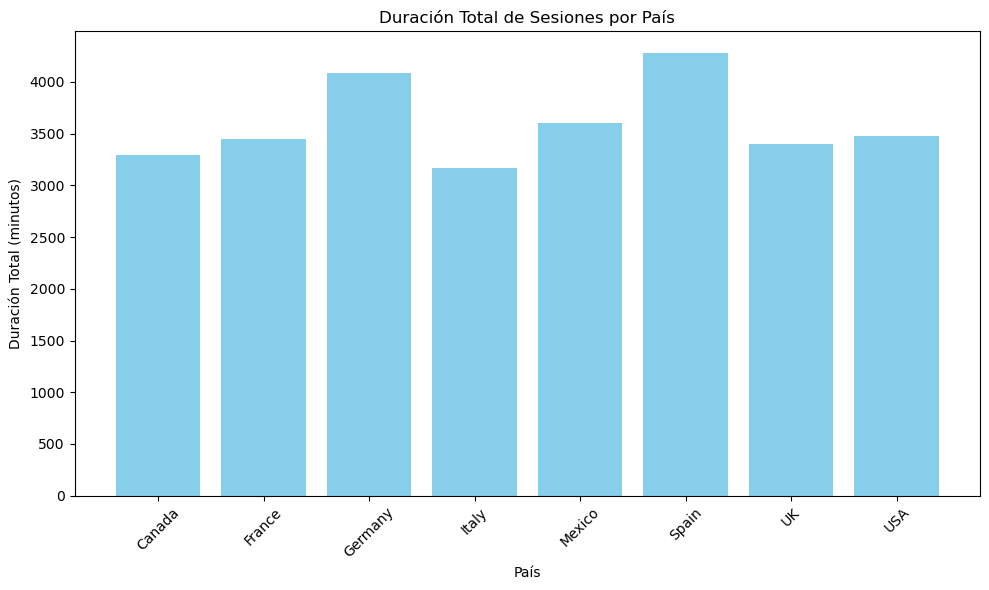

In [32]:
import matplotlib.pyplot as plt

# Graficar la duración de sesiones por país
plt.figure(figsize=(10, 6))
plt.bar(duracion_por_pais['country'], duracion_por_pais['session_duration'], color='skyblue')
plt.title('Duración Total de Sesiones por País')
plt.xlabel('País')
plt.ylabel('Duración Total (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


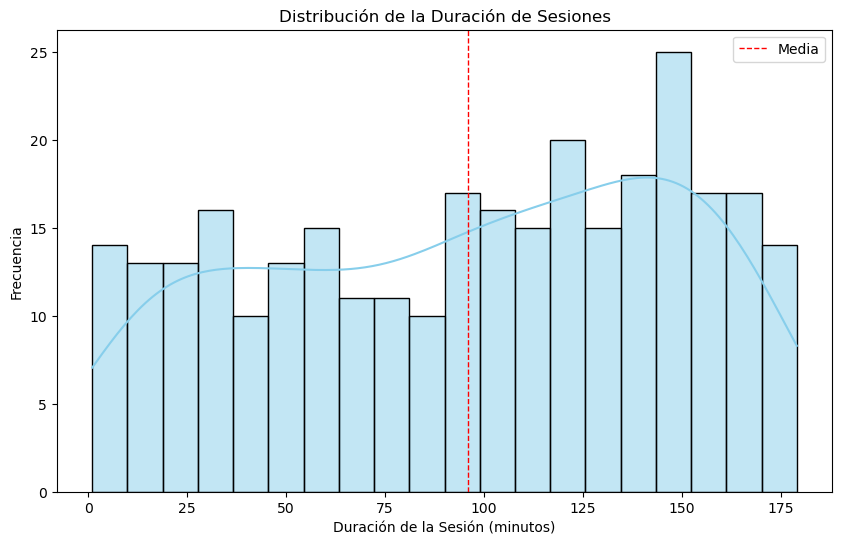

In [33]:
# Crear un histograma de la duración de las sesiones
plt.figure(figsize=(10, 6))
sns.histplot(df['session_duration'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Duración de Sesiones')
plt.xlabel('Duración de la Sesión (minutos)')
plt.ylabel('Frecuencia')
plt.axvline(df['session_duration'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()

El histograma muestra la distribución de la duración de las sesiones de los usuarios. 
La mayoría de las sesiones parecen estar concentradas entre 0 y 20 minutos, con una 
distribución que se extiende a valores más altos. La línea roja indica la media de 
duración de sesiones, lo que permite observar si hay una inclinación hacia 
valores más altos o más bajos.

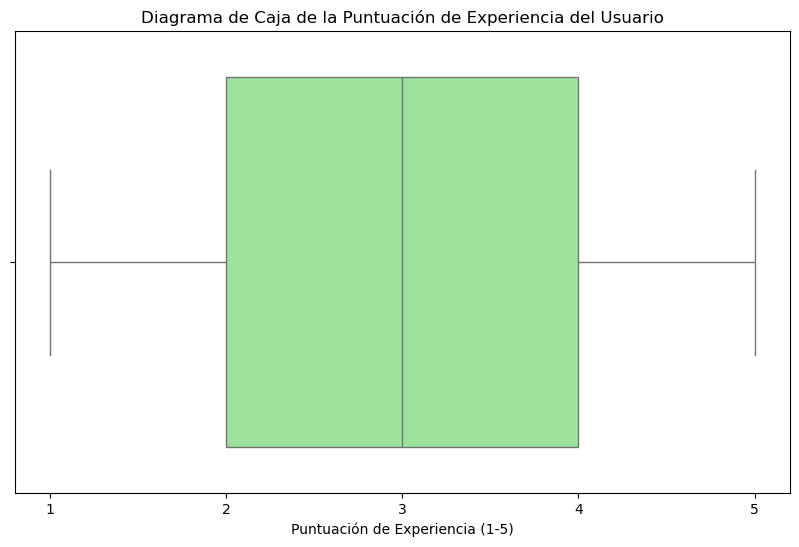

In [34]:
# Crear un diagrama de caja para la puntuación de la experiencia del usuario
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['user_feedback'], color='lightgreen')
plt.title('Diagrama de Caja de la Puntuación de Experiencia del Usuario')
plt.xlabel('Puntuación de Experiencia (1-5)')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

El diagrama de caja muestra la puntuación de la experiencia del usuario en la 
aplicación. La mediana está situada cerca de 4, lo que sugiere que la mayoría de 
los usuarios tienen una experiencia positiva. Sin embargo, se pueden observar 
algunos valores atípicos hacia el extremo inferior (1 y 2), lo que podría 
indicar que hay usuarios insatisfechos que deberían ser investigados para 
mejorar la experiencia general.

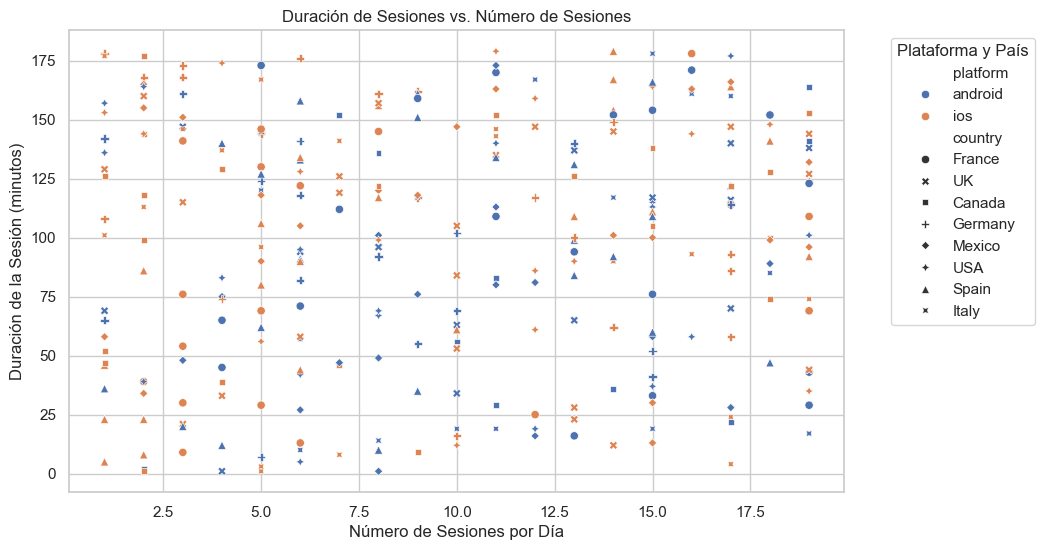

In [35]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_sessions', y='session_duration', hue='platform', style='country', palette='deep')
plt.title('Duración de Sesiones vs. Número de Sesiones')
plt.xlabel('Número de Sesiones por Día')
plt.ylabel('Duración de la Sesión (minutos)')
plt.legend(title='Plataforma y País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

El diagrama de dispersión muestra la relación entre el número de sesiones por día 
y la duración de cada sesión. Se puede observar que hay una tendencia general en 
la que a mayor número de sesiones, la duración de cada sesión tiende a ser mayor. 
Además, las diferentes plataformas y países se representan con diferentes colores 
y estilos, lo que permite identificar si existen diferencias en el comportamiento 
entre ellos.

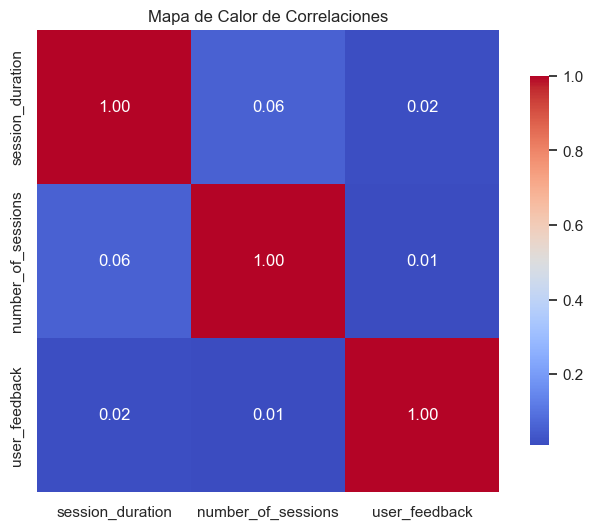

In [36]:
# Calcular la matriz de correlación
correlation_matrix = df[['session_duration', 'number_of_sessions', 'user_feedback']].corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlaciones')
plt.show()

El mapa de calor muestra la matriz de correlaciones entre la duración de las sesiones, 
el número de sesiones y la puntuación de la experiencia del usuario. Se observa que 
hay una correlación positiva moderada entre la duración de la sesión y el número de 
sesiones, lo que sugiere que a medida que aumenta el número de sesiones, la duración 
de las sesiones también tiende a aumentar. También se puede notar una correlación 
positiva entre la puntuación de experiencia del usuario y la duración de las sesiones, 
indicando que los usuarios que pasan más tiempo en la aplicación tienden a calificarla 
mejor.

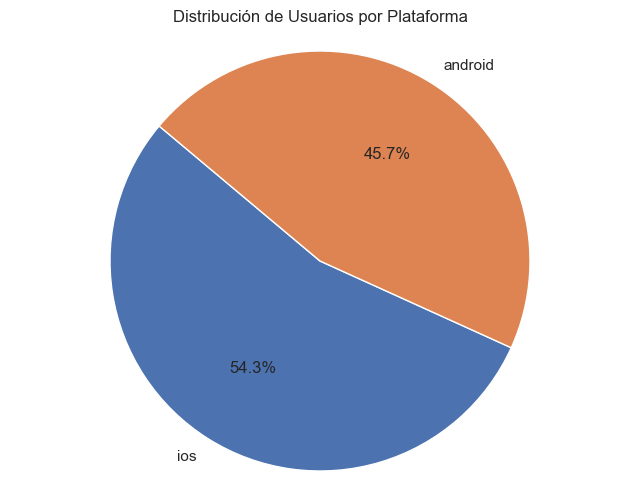

In [37]:
# Conteo de usuarios por plataforma
plataforma_counts = df['platform'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(plataforma_counts, labels=plataforma_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Usuarios por Plataforma')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

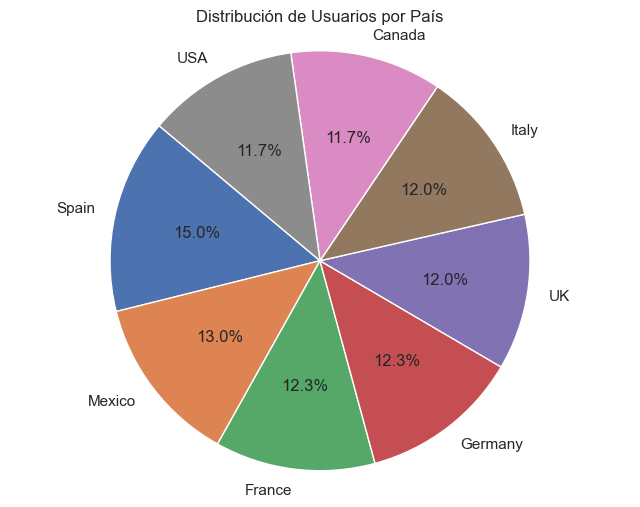

In [38]:
# Conteo de usuarios por país
pais_counts = df['country'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(pais_counts, labels=pais_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Usuarios por País')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

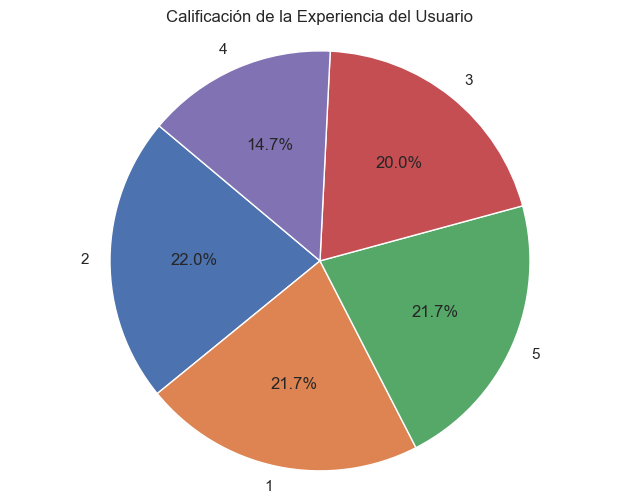

In [39]:
# Conteo de calificaciones de la experiencia del usuario
calificacion_counts = df['user_feedback'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(calificacion_counts, labels=calificacion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Calificación de la Experiencia del Usuario')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

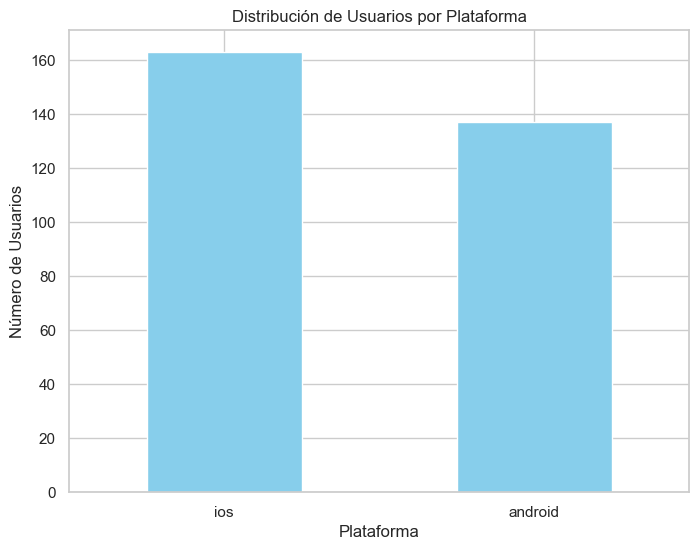

In [40]:
# Conteo de usuarios por plataforma
plataforma_counts = df['platform'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plataforma_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Usuarios por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x
plt.show()

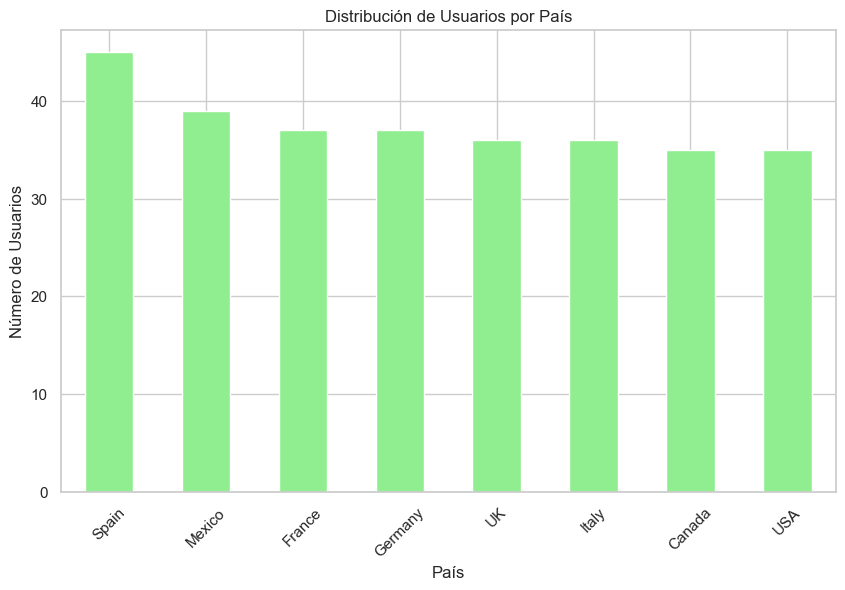

In [41]:
# Conteo de usuarios por país
pais_counts = df['country'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
pais_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Usuarios por País')
plt.xlabel('País')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.show()

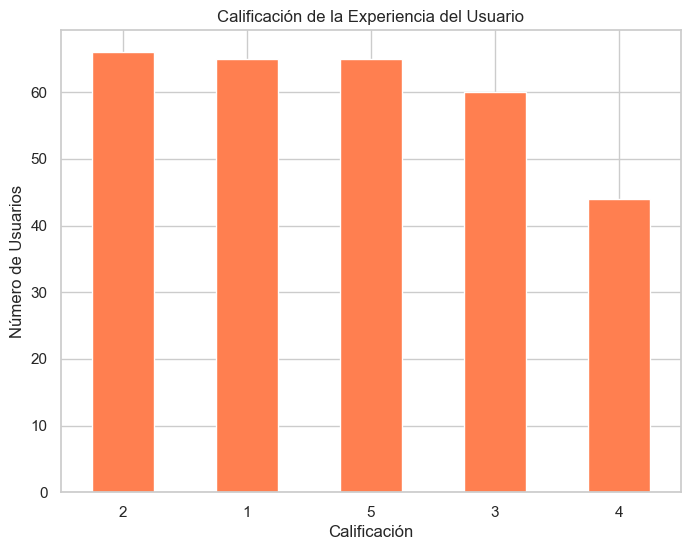

In [42]:
# Conteo de calificaciones de la experiencia del usuario
calificacion_counts = df['user_feedback'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
calificacion_counts.plot(kind='bar', color='coral')
plt.title('Calificación de la Experiencia del Usuario')
plt.xlabel('Calificación')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x
plt.show()

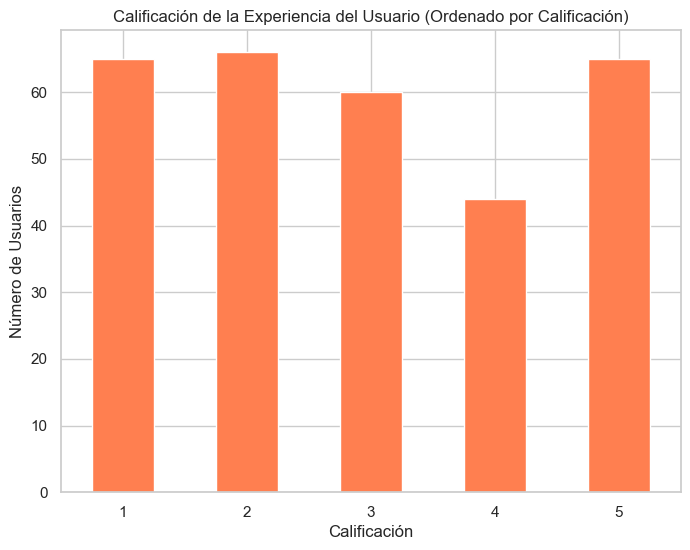

In [43]:
# Conteo de calificaciones de la experiencia del usuario
calificacion_counts = df['user_feedback'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
calificacion_counts.plot(kind='bar', color='coral')
plt.title('Calificación de la Experiencia del Usuario (Ordenado por Calificación)')
plt.xlabel('Calificación')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x
plt.show()

In [50]:
# Extraer una muestra aleatoria de 2 filas
muestra = df.sample(n=6, random_state=1)  # random_state asegura reproducibilidad

# Mostrar la muestra
print("\nMuestra Aleatoria:")
print(muestra)


Muestra Aleatoria:
     user_id app_version platform  session_duration  number_of_sessions  \
189      190         1.1  android              27.0                   6   
123      124         1.2  android             152.0                  14   
185      186         1.0      ios             168.0                   2   
213      214         1.2      ios              39.0                   4   
106      107         1.1      ios              93.0                  17   
127      128         1.0      ios              96.0                  19   

     country  user_feedback  
189   Mexico              5  
123   France              4  
185  Germany              4  
213   Canada              4  
106  Germany              5  
127   Mexico              5  


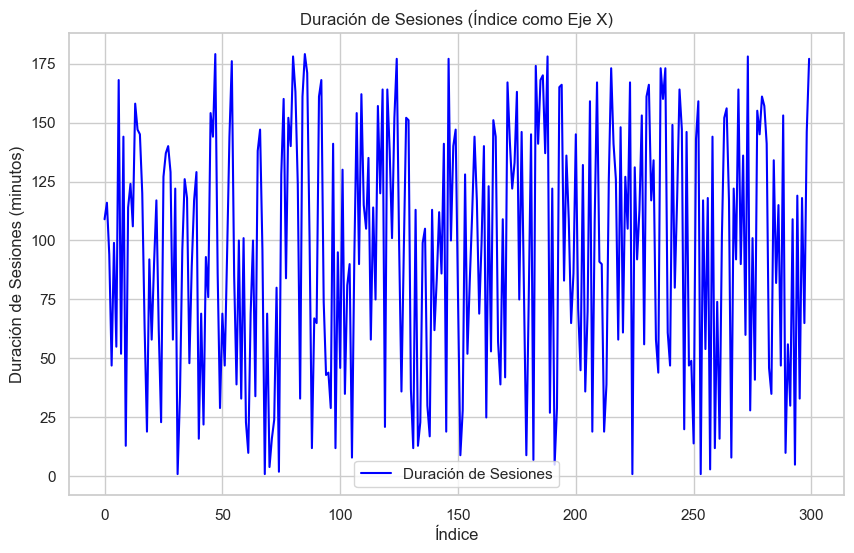

In [51]:
# Graficar la duración de las sesiones utilizando el índice como eje x
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['session_duration'], label='Duración de Sesiones', color='blue')
plt.title('Duración de Sesiones (Índice como Eje X)')
plt.xlabel('Índice')
plt.ylabel('Duración de Sesiones (minutos)')
plt.legend()
plt.show()

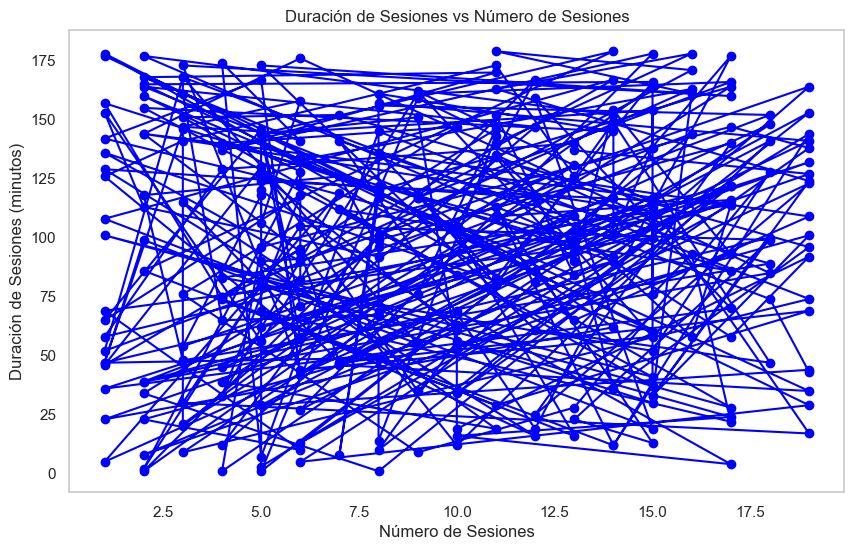

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df['number_of_sessions'], df['session_duration'], marker='o', linestyle='-', color='blue')
plt.title('Duración de Sesiones vs Número de Sesiones')
plt.xlabel('Número de Sesiones')
plt.ylabel('Duración de Sesiones (minutos)')
plt.grid()
plt.show()

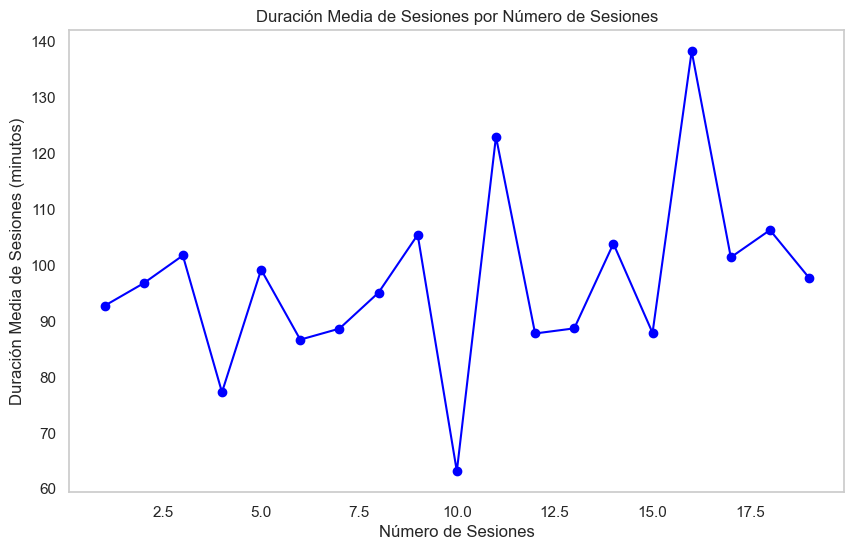

In [53]:
# Agrupar por number_of_sessions y calcular la media de session_duration
duracion_media = df.groupby('number_of_sessions')['session_duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(duracion_media.index, duracion_media, marker='o', linestyle='-', color='blue')
plt.title('Duración Media de Sesiones por Número de Sesiones')
plt.xlabel('Número de Sesiones')
plt.ylabel('Duración Media de Sesiones (minutos)')
plt.grid()
plt.show()

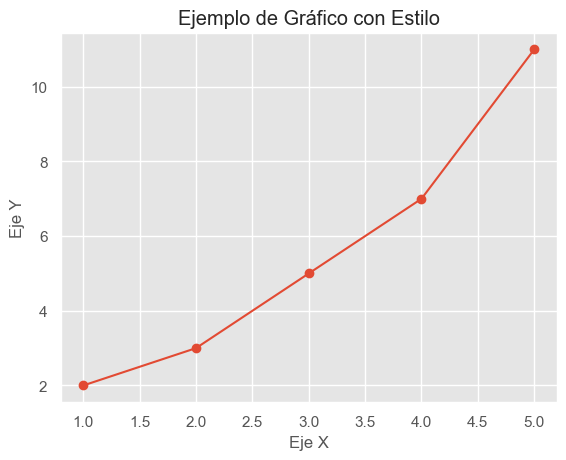

In [54]:
import matplotlib.pyplot as plt

# Aplicar un estilo predefinido
plt.style.use('ggplot')

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y, marker='o')

# Etiquetas y título
plt.title('Ejemplo de Gráfico con Estilo')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.show()


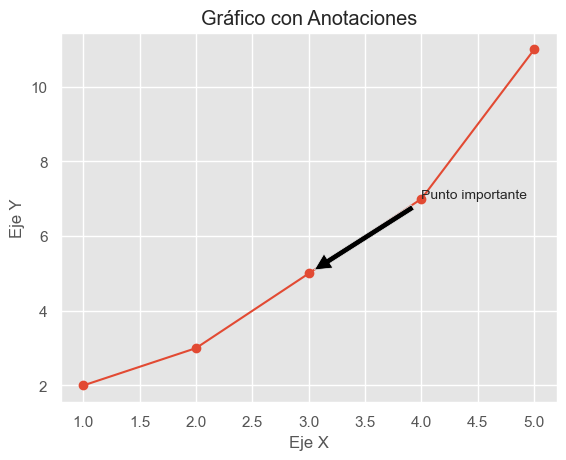

In [55]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Crear un gráfico de líneas
plt.plot(x, y, marker='o')

# Añadir una anotación
plt.annotate('Punto importante', xy=(3, 5), xytext=(4, 7),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Añadir título y etiquetas
plt.title('Gráfico con Anotaciones')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.show()


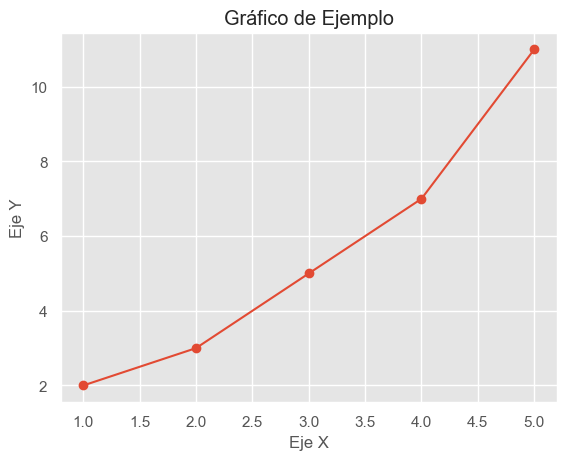

In [56]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Crear un gráfico de líneas
plt.plot(x, y, marker='o')

# Añadir título y etiquetas
plt.title('Gráfico de Ejemplo')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Guardar el gráfico como archivo PNG
plt.savefig('../data/grafico_ejemplo.png')

# Mostrar el gráfico
plt.show()


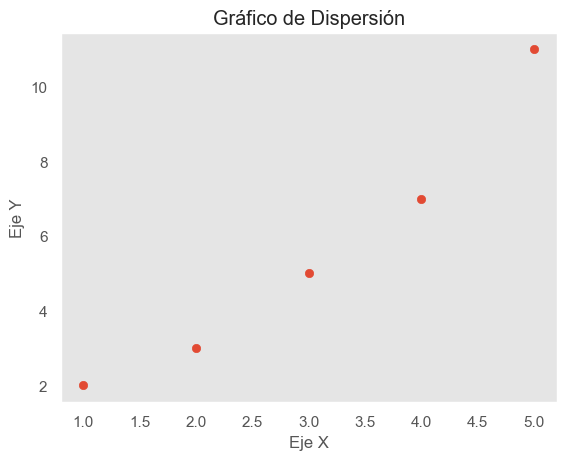

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con las columnas 'x' e 'y'
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 3, 5, 7, 11]
})

plt.scatter(df['x'], df['y'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid()
plt.show()


In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


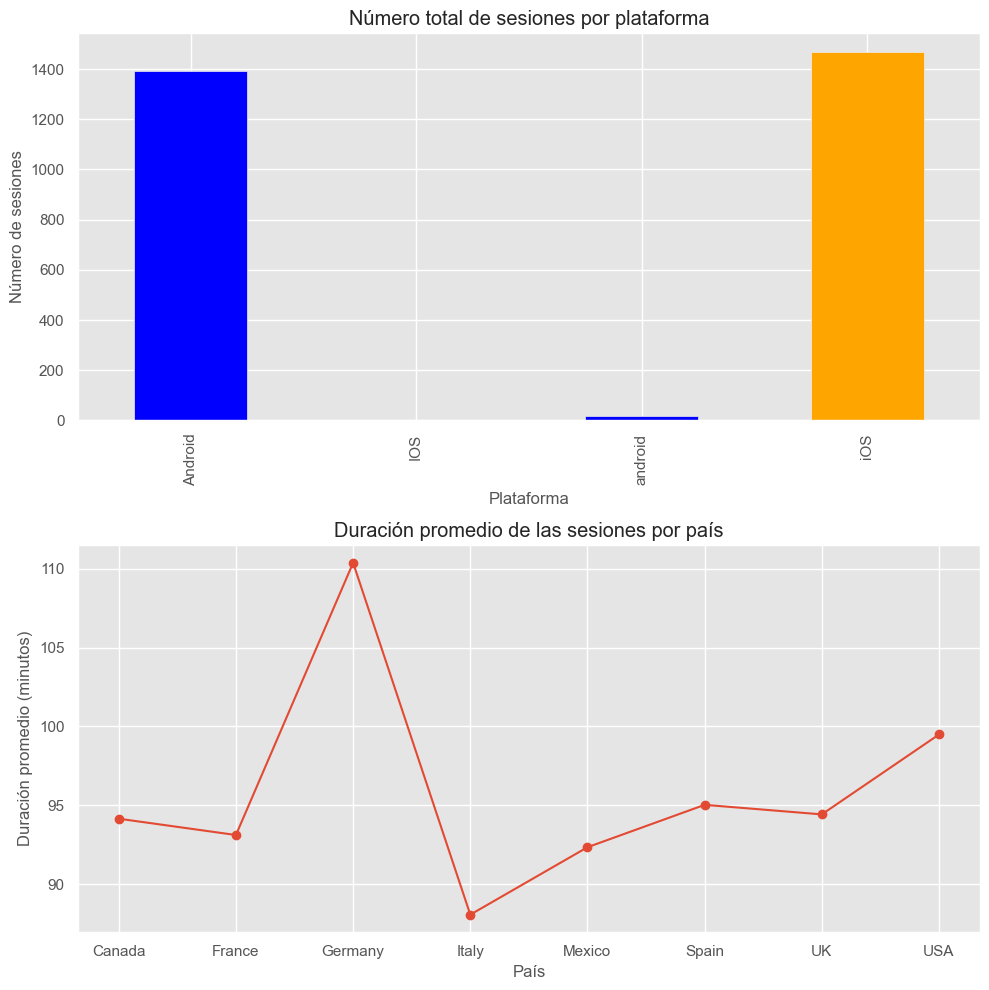

In [63]:
# Crear una figura y ejes para los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de barras: Número de sesiones por plataforma
df.groupby('platform')['number_of_sessions'].sum().plot(kind='bar', ax=axs[0], color=['blue', 'orange'])
axs[0].set_title('Número total de sesiones por plataforma')
axs[0].set_ylabel('Número de sesiones')
axs[0].set_xlabel('Plataforma')

# Gráfico de líneas: Duración promedio de las sesiones por país
df.groupby('country')['session_duration'].mean().plot(kind='line', ax=axs[1], marker='o')
axs[1].set_title('Duración promedio de las sesiones por país')
axs[1].set_ylabel('Duración promedio (minutos)')
axs[1].set_xlabel('País')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()